# Función perturbadora

### Ejemplos del uso del módulo disturbing_function de celmech complementado con el func_pert creado para reproducir la notación del capítulo 6 de Murray y Dermott (2000) y de DisturbingFunction de Mathematica.

Primero importamos los módulos necesarios. Necesitamos el módulo $\texttt{disturbing}$_ $\texttt{function}$ de $\texttt{celmech}$ y el módulo  $\texttt{func}$ _$\texttt{pert}$ para calcular la función perturbadora. $\texttt{scipy.integrate}$ es para integrar el sistema de Lagrange, y $\texttt{sympy}$ para visualizar las ecuaciones.

In [1]:
import numpy as np
import sympy as sy

from celmech import disturbing_function as df

import func_pert as fp

from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['text.usetex'] = True
sy.init_printing()

matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)
plt.rcParams.update({'font.size': 8})

### Ejemplo 1: evolución secular de objeto perturbado por un planeta

Si deseamos visualizar la forma de la función perturbadora, podemos escribirla en función de todos los elementos. Para eso, primero cargamos en un diccionario la lista con los términos que aparecen en la función. Para la evolución secular, solamente nencesitamos dar el orden máximo de la función.

In [2]:
A_sec = df.list_secular_terms(0,2)

A_sec

Ahora, usando el módulo $\texttt{func_pert}$ escribimos la función perturbadora. Esto ya identifica si es el caso resonante o secular. Tenemos que decirle simplemente si se trata de el caso externo o interno, ya que los coeficientes cambian.

La función $\texttt{funcion_perturbadora}$ toma como entrada la función perturbadora, los elementos (más el $\mu$), el tipo de perturbación y el valor de alfa. Si queremos ver la función perturbadora genérica, no ponemos ningún alfa.

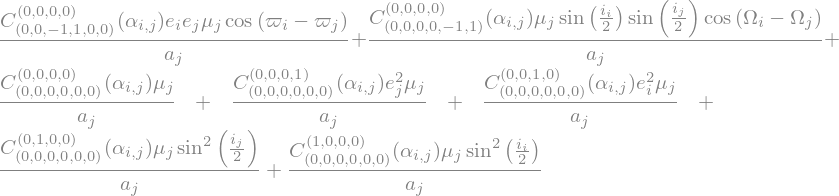

In [30]:
a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j = sy.symbols('a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j')

elementos = [a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,mu_i,a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,mu_j]

#Escribimos la función perturbadora SECULAR
R_sec_E = fp.funcion_perturbadora(A_sec,*elementos,tipo='e')

#Visualizamos
R_sec_E

Para el caso de un perturbador interno, simplemente colocamos $\texttt{tipo='I'}$:

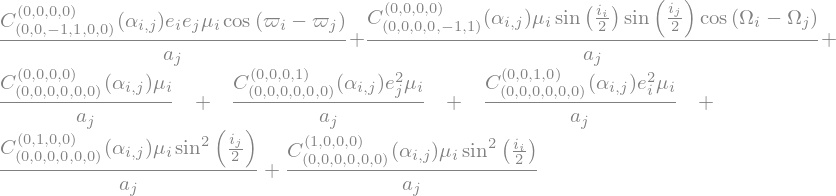

In [4]:
R_sec_I = fp.funcion_perturbadora(A_sec,*elementos,tipo='i')

#Visualizamos
R_sec_I

Las funciones son iguales pero ahora los subíndices j representan el objeto perturbado y los i el objeto perturbador.

### Ejemplo 2: perturbador externo

Vamos a resolver las ecuaciones de Lagrange para la evolución secular de un asteroide perturbado por Júpiter (elegimos un asteroide que no se encuentre en resonancia).

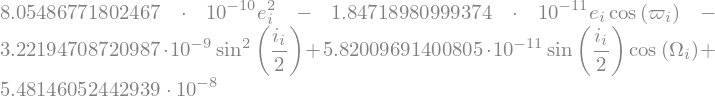

In [31]:
a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j = sy.symbols('a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j')

# Constante gravitacional en días, masas solares y ua
k = 0.01720209895 

# Determinamos las características de la órbita del objeto perturbador
#(que consideramos fija)
mu_j =  k**2 * 1/1047.355
varpi_j = 0
Omega_j = 0
e_j = 0.048
i_j = np.deg2rad(1.035)
a_j = 5.203

a_i0 = 0.192*a_j
alpha = a_i0/a_j

elementos = [a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,mu_i,a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,mu_j]

R_sec_E = fp.funcion_perturbadora(A_sec,*elementos,tipo='e',Alpha=alpha)

R_sec_E

Ahora, para plantear las ecuaciones de Lagrange, necesitamos las derivadas parciales de la función perturbadora respecto a cada elemento del objeto perturbado.

In [6]:
DRa = sy.diff(R_sec_E,a_i)
DRa

In [7]:
DRvarpi = sy.diff(R_sec_E,varpi_i)
DRvarpi

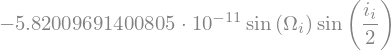

In [8]:
DROmega = sy.diff(R_sec_E,Omega_i)
DROmega

In [9]:
DRe = sy.diff(R_sec_E,e_i)
DRe

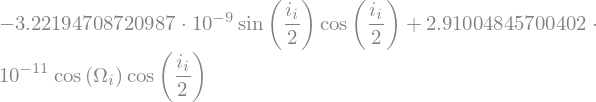

In [10]:
DRi = sy.diff(R_sec_E,i_i)
DRi

In [11]:
DRlambda_o = sy.diff(R_sec_E,lambda_i)
DRlambda_o

Planteamos las ecuaciones de Lagrange sin aproximar:


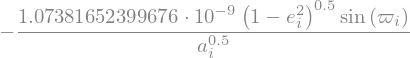

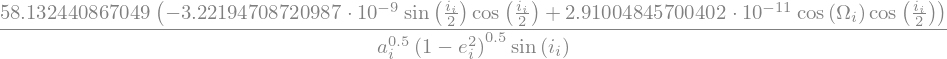

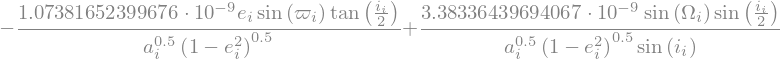

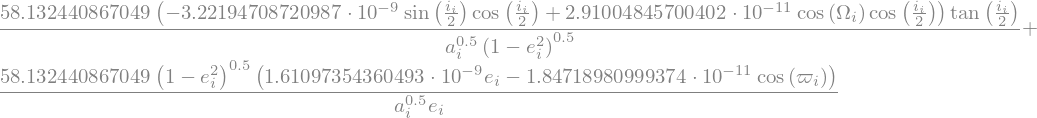

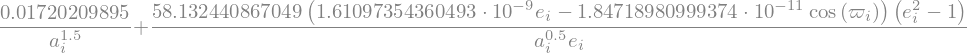

In [12]:
n = k/(a_i**(3/2))

apunto_s = 2/(n*a_i) * DRlambda_o
display(apunto_s)

epunto_s = -(1-e_i**2)**(1/2)/(n*a_i**2*e_i) * DRvarpi - 
    (1-e_i**2)**(1/2)/(n*a_i**2*e_i) * (1-(1-e_i**2)**(1/2) ) * DRlambda_o
display(epunto_s)

Omegapunto_s = 1/(n*a_i**2*(1-e_i**2)**(1/2)*sy.sin(i_i))*DRi
display(Omegapunto_s)

ipunto_s = -sy.tan(i_i/2) / (n*a_i**2*(1-e_i**2)**(1/2))*(DRvarpi+DRlambda_o)- 
        1/(n*a_i**2*(1-e_i**2)**(1/2)*sy.sin(i_i))*DROmega
display(ipunto_s)

varpipunto_s = (1-e_i**2)**(1/2)/(n*a_i**2*e_i)*DRe + 
        sy.tan(i_i/2)/(n*a_i**2*(1-e_i**2)**(1/2))*DRi
display(varpipunto_s)

lambdaopunto_s = -(1-e_i**2)/(n*a_i**2*e_i)*DRe -  2/(n*a_i)*DRa+ n
display(lambdaopunto_s)

lambdappunto_s = k/a_j**(3/2)
display(lambdappunto_s)

Para resolver el sistema usamos scipy, por lo que tenemos que transformar los objetos sympy en funciones. Para eso usamos lambdify.

In [13]:
apunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],apunto_s)
epunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], epunto_s)
varpipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], varpipunto_s)
Omegapunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], Omegapunto_s)
ipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], ipunto_s)
lambdaipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],lambdaopunto_s)
lambdajpunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],lambdappunto_s)

Usando $\texttt{scipy.integrate}$ integramos el sistema de ecuaciones.

In [14]:
def lagrange_sist(t, variables):
    a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j = variables
    
    apunto = apunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    epunto = epunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    ipunto = ipunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    varpipunto = varpipunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    Omegapunto = Omegapunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    lambdaipunto = lambdaipunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    lambdajpunto = lambdajpunto_f(a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j)
    
    return [apunto,epunto,ipunto,varpipunto,Omegapunto,lambdaipunto,lambdajpunto]

#Condiciones iniciales y0 = (a(0),e(0),i(0),varpi(0),Omega(0),lambda_i(0),lambda_j(0))
y0 = [a_i0,0.1,np.deg2rad(5),np.deg2rad(130),np.deg2rad(200),np.deg2rad(300),0]

#t = arange(tiempo_inicial, tiempo_final[días], paso_temporal)
t = np.arange(0, 365*250000, 100000)

#Solución
evolucion = odeint(lagrange_sist, y0, t, tfirst=True)

Graficamos las soluciones.

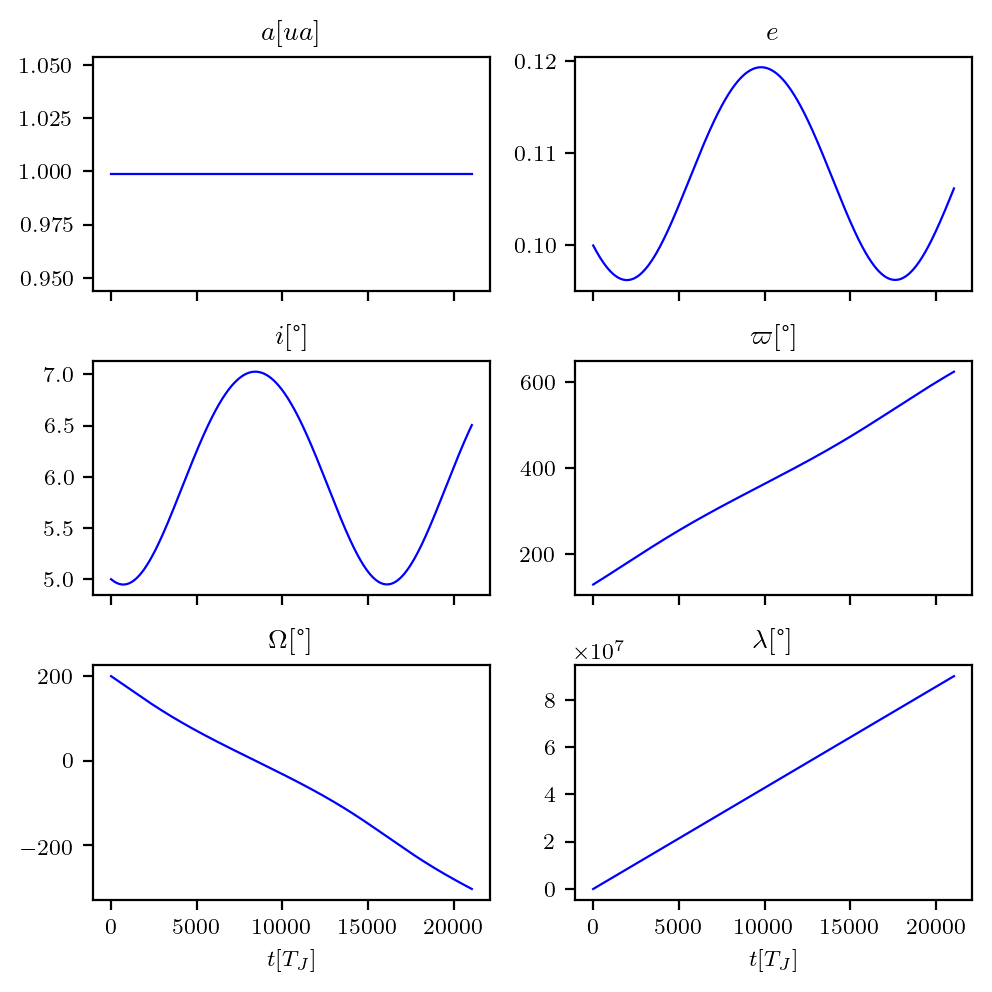

In [15]:
fig, axs = plt.subplots(3, 2, dpi=200, figsize=(5,5),sharex=True,sharey=False)
axs[1, 1].plot(t/(11.86*365.25),np.rad2deg(evolucion[:,3]),'b',linewidth=0.8)
axs[1, 1].set_title('$\\varpi[$°$]$')
axs[2, 0].plot(t/(11.86*365.25),np.rad2deg(evolucion[:,4]),'b',linewidth=0.8)
axs[2, 0].set_title('$\\Omega[$°$]$')
axs[1, 0].plot(t/(11.86*365.25),np.rad2deg(evolucion[:,2]),'b',linewidth=0.8)
axs[1, 0].set_title('$i[$°$]$')
axs[0, 1].plot(t/(11.86*365.25),(evolucion[:,1]),'b',linewidth=0.8)
axs[0, 1].set_title('$e$')
axs[0, 0].plot(t/(11.86*365.25),evolucion[:,0],'b',linewidth=0.8)
axs[0, 0].set_title('$a[ua]$')
axs[2, 1].plot(t/(11.86*365.25),np.rad2deg(evolucion[:,5]),'b',linewidth=0.8)
axs[2, 1].set_title('$\\lambda[$°$]$')
axs[2, 0].set_xlabel('$t[T_J]$')
axs[2, 1].set_xlabel('$t[T_J]$')
plt.tight_layout()

## Ejemplo 3: perturbador interno

Es todo lo mismo pero con la función perturbadora interna. Ahora vemos el ejemplo de un objeto transneptuniano perturbado por Neptuno.

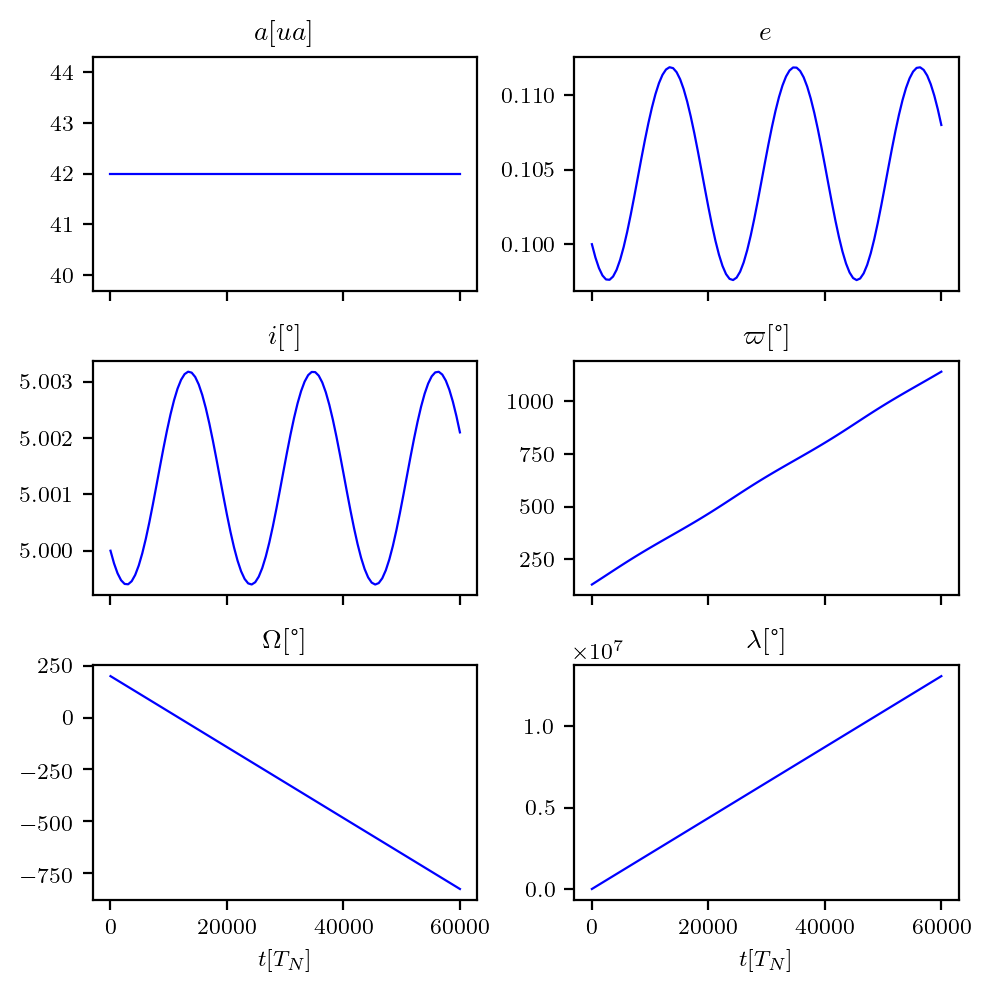

In [16]:
a_N,a_j,e_N,e_j,i_N,i_j,varpi_N,varpi_j,Omega_N,Omega_j,lambda_N,lambda_j,mu_N,mu_j = sy.symbols('a_N,a_j,e_N,e_j,i_N,i_j,varpi_N,varpi_j,Omega_N,Omega_j,lambda_N,lambda_j,mu_N,mu_j')

k = 0.01720209895
mu_N =  k**2 * 0.00005149
varpi_N = 0
Omega_N = 0
e_N = 0.00859
i_N = 0
a_N = 30.1
a_j0 = 42
alpha = a_N/a_j0

elementos = [a_N,e_N,i_N,varpi_N,Omega_N,lambda_N,mu_N,a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,mu_j]
R_sec_I = fp.funcion_perturbadora(A_sec,*elementos,tipo='i',Alpha=alpha)
[DRa,DRe,DRi,DRvarpi,DROmega,DRlambda_o] = [sy.diff(R_sec_I,a_j),sy.diff(R_sec_I,e_j),sy.diff(R_sec_I,i_j),sy.diff(R_sec_I,varpi_j),sy.diff(R_sec_I,Omega_j),sy.diff(R_sec_I,lambda_j)]

#Ecuaciones de Lagrange
n = k/(a_j**(3/2))
apunto_s = 2/(n*a_j) * DRlambda_o
epunto_s = -(1-e_j**2)**(1/2)/(n*a_j**2*e_j) * DRvarpi - (1-e_j**2)**(1/2)/(n*a_j**2*e_j) * (1-(1-e_j**2)**(1/2) ) * DRlambda_o
Omegapunto_s = 1/(n*a_j**2*(1-e_j**2)**(1/2)*sy.sin(i_j))*DRi
ipunto_s = -sy.tan(i_j/2) / (n*a_j**2*(1-e_j**2)**(1/2))*(DRvarpi+DRlambda_o) - 1/(n*a_j**2*(1-e_j**2)**(1/2)*sy.sin(i_j))*DROmega
varpipunto_s = (1-e_j**2)**(1/2)/(n*a_j**2*e_j)*DRe + sy.tan(i_j/2)/(n*a_j**2*(1-e_j**2)**(1/2))*DRi
lambdaopunto_s = -(1-e_j**2)/(n*a_j**2*e_j)*DRe -  2/(n*a_j)*DRa+ n
lambdappunto_s = k/a_N**(3/2)

apunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N],apunto_s)
epunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N], epunto_s)
varpipunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N], varpipunto_s)
Omegapunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N], Omegapunto_s)
ipunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N], ipunto_s)
lambdajpunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N],lambdaopunto_s)
lambdaipunto_f = sy.lambdify([a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,lambda_N],lambdappunto_s)

def lagrange_sist(t, variables):
    a,e,i,varpi,Omega,lambda_o,lambda_p = variables
    apunto = apunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    epunto = epunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    ipunto = ipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    varpipunto = varpipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    Omegapunto = Omegapunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    lambdajpunto = lambdajpunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    lambdaipunto = lambdaipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    return [apunto,epunto,ipunto,varpipunto,Omegapunto,lambdajpunto,lambdaipunto]

y0 = [a_j0,0.1,np.deg2rad(5),np.deg2rad(130),np.deg2rad(200),np.deg2rad(30),0]
t = np.arange(0, 365*1e7, 365*1e5)
evolucion = odeint(lagrange_sist, y0, t, tfirst=True)

fig, axs = plt.subplots(3, 2, dpi=200, figsize=(5,5),sharex=True,sharey=False)
axs[1, 1].plot(t/(164.79*365.25),np.rad2deg(evolucion[:,3]),'b',linewidth=0.8)
axs[1, 1].set_title('$\\varpi[$°$]$')
axs[2, 0].plot(t/(164.79*365.25),np.rad2deg(evolucion[:,4]),'b',linewidth=0.8)
axs[2, 0].set_title('$\\Omega[$°$]$')
axs[1, 0].plot(t/(164.79*365.25),np.rad2deg(evolucion[:,2]),'b',linewidth=0.8)
axs[1, 0].set_title('$i[$°$]$')
axs[0, 1].plot(t/(164.79*365.25),evolucion[:,1],'b',linewidth=0.8)
axs[0, 1].set_title('$e$')
axs[0, 0].plot(t/(164.79*365.25),evolucion[:,0],'b',linewidth=0.8)
axs[0, 0].set_title('$a[ua]$')
axs[2, 1].plot(t/(164.79*365.25),np.rad2deg(evolucion[:,5]),'b',linewidth=0.8)
axs[2, 1].set_title('$\\lambda[$°$]$')
axs[2, 0].set_xlabel('$t[T_N]$')
axs[2, 1].set_xlabel('$t[T_N]$')
plt.tight_layout()

## Ejemplo 4: resonancia 2:1 con Júpiter

Vamos a ver la evolución de un asteroide en una resonancia 2:1 con Júpiter.

Este ejemplo está basado en el ejemplo 6.9.2 de Murray y Dermott.

In [17]:
a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j = sy.symbols('a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j')
k = 0.01720209895

#Determinamos las características de la órbita del objeto perturbador (que consideramos fija)
mu_j =  k**2 * 1/1047.355
varpi_j = 0
Omega_j = 0
e_j = 0.048
i_j = np.deg2rad(0)
a_j = 5.2038

a_i0 = 0.6*a_j

alpha = a_i0/a_j

elementos = [a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,mu_i,a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,mu_j]

#A los términos seculares de la función perturbadora se le suman los resonantes.
#Se calculan con df.list_resonance_terms(p,p-q,min_order,max_order)
A_res = df.list_secular_terms(0,2) + df.list_resonance_terms(2,1,0,2)

#Escribimos la función perturbadora
R_res_E = fp.funcion_perturbadora(A_res,*elementos,tipo='e',Alpha=alpha)

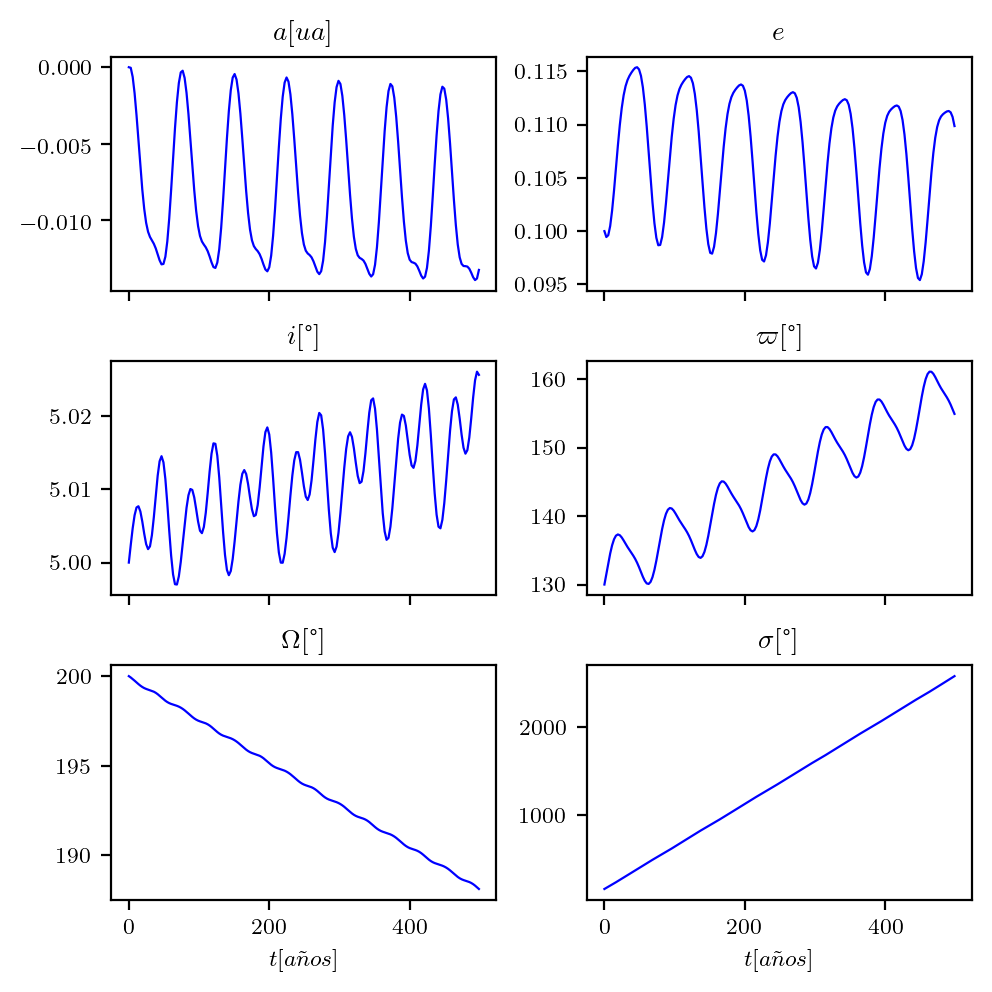

In [18]:
#Calculamos las derivadas parciales
[DRa,DRe,DRi,DRvarpi,DROmega,DRlambda_o] = [sy.diff(R_res_E,a_i),sy.diff(R_res_E,e_i),sy.diff(R_res_E,i_i),sy.diff(R_res_E,varpi_i),sy.diff(R_res_E,Omega_i),sy.diff(R_res_E,lambda_i)]

#Planteamos las ecuaciones de Lagrange usando las derivadas
n = k/(a_i**(3/2))

apunto_s = 2/(n*a_i) * DRlambda_o
epunto_s = -(1-e_i**2)**(1/2)/(n*a_i**2*e_i) * DRvarpi - (1-e_i**2)**(1/2)/(n*a_i**2*e_i) * (1-(1-e_i**2)**(1/2) ) * DRlambda_o
Omegapunto_s = 1/(n*a_i**2*(1-e_i**2)**(1/2)*sy.sin(i_i))*DRi
ipunto_s = -sy.tan(i_i/2) / (n*a_i**2*(1-e_i**2)**(1/2))*(DRvarpi+DRlambda_o) - 1/(n*a_i**2*(1-e_i**2)**(1/2)*sy.sin(i_i))*DROmega
varpipunto_s = (1-e_i**2)**(1/2)/(n*a_i**2*e_i)*DRe + sy.tan(i_i/2)/(n*a_i**2*(1-e_i**2)**(1/2))*DRi
lambdaopunto_s = -(1-e_i**2)/(n*a_i**2*e_i)*DRe -  2/(n*a_i)*DRa+ n
lambdappunto_s = k/a_j**(3/2)

apunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],apunto_s)
epunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], epunto_s)
varpipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], varpipunto_s)
Omegapunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], Omegapunto_s)
ipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], ipunto_s)
lambdaipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],lambdaopunto_s)
lambdajpunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],lambdappunto_s)

def lagrange_sist(t, variables):
    a,e,i,varpi,Omega,lambda_o,lambda_p = variables
    
    apunto = apunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    epunto = epunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    ipunto = ipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    varpipunto = varpipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    Omegapunto = Omegapunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    lambdaipunto = lambdaipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    lambdajpunto = lambdajpunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    
    return [apunto,epunto,ipunto,varpipunto,Omegapunto,lambdaipunto,lambdajpunto]

#Condiciones iniciales
y0 = [a_i0,0.1,np.deg2rad(5),np.deg2rad(130),np.deg2rad(200),np.deg2rad(30),0]

#t = arange(tiempo_inicial, tiempo_final[días], paso_temporal)
t = np.arange(0, 365*500, 1000)

#Solución
evolucion = odeint(lagrange_sist, y0, t, tfirst=True)

#Graficamos
fig, axs = plt.subplots(3, 2, dpi=200, figsize=(5,5),sharex=True,sharey=False)
axs[1, 1].plot(t/365.25,np.rad2deg(evolucion[:,3]),'b',linewidth=0.8)
axs[1, 1].set_title('$\\varpi[$°$]$')
axs[2, 0].plot(t/365.25,np.rad2deg(evolucion[:,4]),'b',linewidth=0.8)
axs[2, 0].set_title('$\\Omega[$°$]$')
axs[1, 0].plot(t/365.25,np.rad2deg(evolucion[:,2]),'b',linewidth=0.8)
axs[1, 0].set_title('$i[$°$]$')
axs[0, 1].plot(t/365.25,evolucion[:,1],'b',linewidth=0.8)
axs[0, 1].set_title('$e$')
axs[0, 0].plot(t/365.25,evolucion[:,0]-a_i0,'b',linewidth=0.8)
axs[0, 0].set_title('$a[ua]$')

# Graficamos el ángulo crítico que es interesante ver en una resonancia
axs[2, 1].plot(t/365.25,np.rad2deg(evolucion[:,5]-2*evolucion[:,6]+evolucion[:,3]),'b',linewidth=0.8)
axs[2, 1].set_title('$\\sigma[$°$]$')
axs[2, 0].set_xlabel('$t[a\\tilde n os]$')
axs[2, 1].set_xlabel('$t[a\\tilde n os]$')
plt.tight_layout()

Podemos acercarnos un poco más a la resonancia para ver cómo el ángulo crítico oscila.

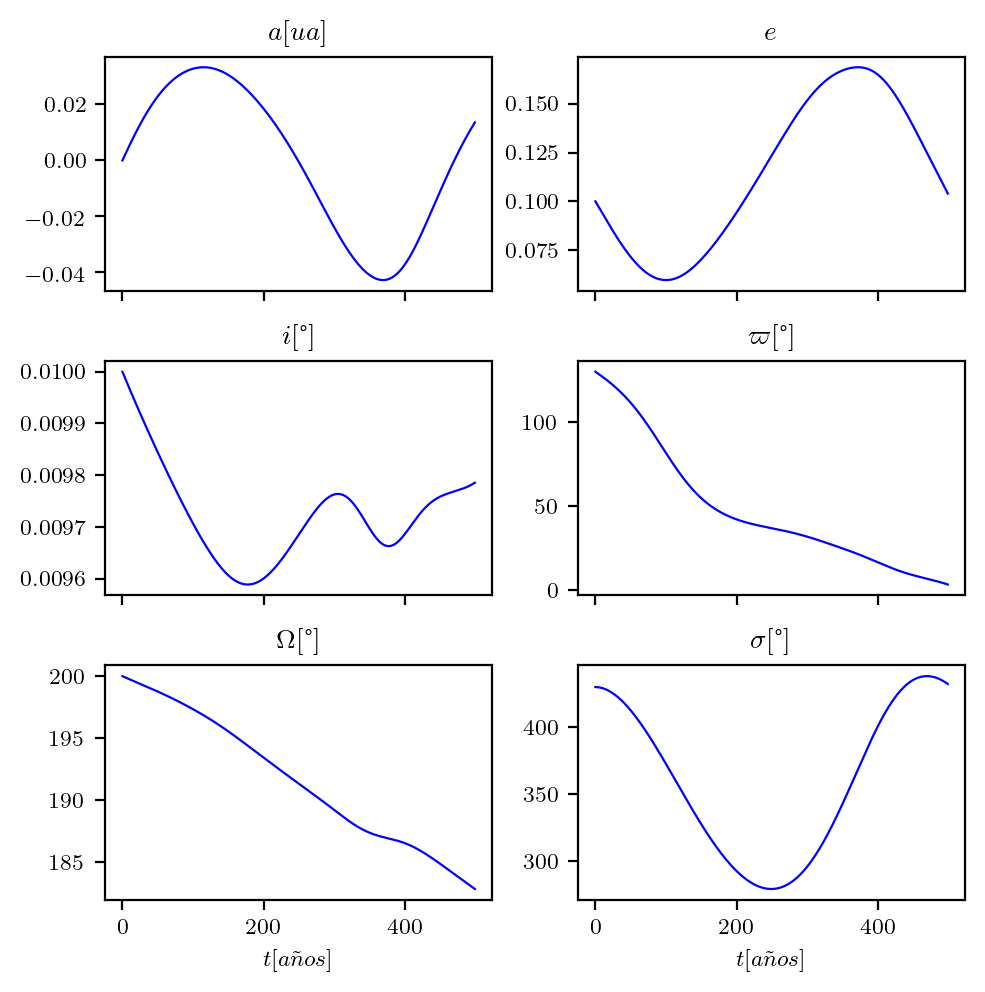

In [19]:
a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j = sy.symbols('a_i,a_j,e_i,e_j,i_i,i_j,varpi_i,varpi_j,Omega_i,Omega_j,lambda_i,lambda_j,mu_i,mu_j')
k = 0.01720209895

mu_j =  k**2 * 1/1047.355
varpi_j = 0
Omega_j = 0
e_j = 0.048
i_j = np.deg2rad(0)
a_j = 5.2038

a_i0 = 0.63*a_j    # 0.63a_j está más cerca de la resonancia
alpha = a_i0/a_j

elementos = [a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,mu_i,a_j,e_j,i_j,varpi_j,Omega_j,lambda_j,mu_j]

A_res = df.list_secular_terms(0,2) + df.list_resonance_terms(2,1,0,2)

R_res_E = fp.funcion_perturbadora(A_res,*elementos,tipo='e',Alpha=alpha)

[DRa,DRe,DRi,DRvarpi,DROmega,DRlambda_o] = [sy.diff(R_res_E,a_i),sy.diff(R_res_E,e_i),sy.diff(R_res_E,i_i),sy.diff(R_res_E,varpi_i),sy.diff(R_res_E,Omega_i),sy.diff(R_res_E,lambda_i)]

#Planteamos las ecuaciones de Lagrange usando las derivadas
n = k/(a_i**(3/2))

apunto_s = 2/(n*a_i) * DRlambda_o
epunto_s = -(1-e_i**2)**(1/2)/(n*a_i**2*e_i) * DRvarpi - (1-e_i**2)**(1/2)/(n*a_i**2*e_i) * (1-(1-e_i**2)**(1/2) ) * DRlambda_o
Omegapunto_s = 1/(n*a_i**2*(1-e_i**2)**(1/2)*sy.sin(i_i))*DRi
ipunto_s = -sy.tan(i_i/2) / (n*a_i**2*(1-e_i**2)**(1/2))*(DRvarpi+DRlambda_o) - 1/(n*a_i**2*(1-e_i**2)**(1/2)*sy.sin(i_i))*DROmega
varpipunto_s = (1-e_i**2)**(1/2)/(n*a_i**2*e_i)*DRe + sy.tan(i_i/2)/(n*a_i**2*(1-e_i**2)**(1/2))*DRi
lambdaopunto_s = -(1-e_i**2)/(n*a_i**2*e_i)*DRe -  2/(n*a_i)*DRa+ n
lambdappunto_s = k/a_j**(3/2)

apunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],apunto_s)
epunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], epunto_s)
varpipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], varpipunto_s)
Omegapunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], Omegapunto_s)
ipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j], ipunto_s)
lambdaipunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],lambdaopunto_s)
lambdajpunto_f = sy.lambdify([a_i,e_i,i_i,varpi_i,Omega_i,lambda_i,lambda_j],lambdappunto_s)

def lagrange_sist(t, variables):
    a,e,i,varpi,Omega,lambda_o,lambda_p = variables
    
    apunto = apunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    epunto = epunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    ipunto = ipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    varpipunto = varpipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    Omegapunto = Omegapunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    lambdaipunto = lambdaipunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    lambdajpunto = lambdajpunto_f(a,e,i,varpi,Omega,lambda_o,lambda_p)
    
    return [apunto,epunto,ipunto,varpipunto,Omegapunto,lambdaipunto,lambdajpunto]

#Condiciones iniciales y0 = (lambda_i(0),lambda_j(0),varpi(0),Omega(0),i(0),e(0),a(0))
y0 = [a_i0,0.1,np.deg2rad(0.01),np.deg2rad(130),np.deg2rad(200),np.deg2rad(300),0]

#t = arange(tiempo_inicial, tiempo_final[días], paso_temporal)
t = np.arange(0, 365*500, 100)

#Solución
evolucion = odeint(lagrange_sist, y0, t, tfirst=True)

fig, axs = plt.subplots(3, 2, dpi=200, figsize=(5,5),sharex=True,sharey=False)
axs[1, 1].plot(t/365.25,np.rad2deg(evolucion[:,3]),'b',linewidth=0.8)
axs[1, 1].set_title('$\\varpi[$°$]$')
axs[2, 0].plot(t/365.25,np.rad2deg(evolucion[:,4]),'b',linewidth=0.8)
axs[2, 0].set_title('$\\Omega[$°$]$')
axs[1, 0].plot(t/365.25,np.rad2deg(evolucion[:,2]),'b',linewidth=0.8)
axs[1, 0].set_title('$i[$°$]$')
axs[0, 1].plot(t/365.25,evolucion[:,1],'b',linewidth=0.8)
axs[0, 1].set_title('$e$')
axs[0, 0].plot(t/365.25,evolucion[:,0]-a_i0,'b',linewidth=0.8)
axs[0, 0].set_title('$a[ua]$')

axs[2, 1].plot(t/365.25,np.rad2deg(evolucion[:,5]-2*evolucion[:,6]+evolucion[:,3]),'b',linewidth=0.8)
axs[2, 1].set_title('$\\sigma[$°$]$')
axs[2, 0].set_xlabel('$t[a\\tilde n os]$')
axs[2, 1].set_xlabel('$t[a\\tilde n os]$')
plt.tight_layout()